# Integrated Project : Games

### Project description:

Ice is online store, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources.
We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

The dada in front of us is going back to 2016. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

* [1. Open the data and study the general information](#PLoad-the-data:)
* [2. Prepare the data](#Prepare-the-data:)
    *  [2.1 name and genre columns](#name-and-genre-columns:)
    *  [2.2 year_of_release column](#year_of_release-column:)
    *  [2.3 critic_score and user_score columns](#critic_score-and-user_score-columns:)
    *  [2.4 rating column](#%22rating%22-coumn:)
* [3. Analyze the data](#Analyze-the-data:)
    * 3.1 [mid conclution:](#mid-conclution:)
* [4. create user profile for each region](#create-user-profile-for-each-region:)
* [5. Test the follwing hypotheses](#Test-the-follwing-hypotheses:)
* [Genral coclution](#Genral-coclution:)

The dataset contains the following fields:

- `Name`
- `Platform`
- `Year_of_Release`
- `Genre`
- `NA_sales`- (North American sales in USD million)
- `EU_sales` - (sales in Europe in USD million)
- `JP_sales` - (sales in Japan in USD million)
- `Other_sales` - (sales in other countries in USD million)
- `Critic_Score`-  (maximum of 100)
- `User_Score` - (maximum of 10)
- `Rating` -(by ESRB: The Entertainment Software Rating Board)

### Load the data:

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from nltk.stem import SnowballStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px

In [2]:
# Load the data
try:
     games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
    
games_org = games.copy()
    

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# replace the column names to lowecase: 
games.columns= games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2003.0,2007.0,2010.0,2016.0
genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
user_score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Prepare the data:

**(by Profile Report:)**
* There are 11 columns, and 16,715 rows in "games", 22,318 missing cels 12.1%.
* There are no duplicates.

* "name" column: 
    * object type
    * 11,559 distinct values, 2 missing values.

* "platform" column:
    * object type
    * 31 distinct values, ther's no missing values.

* "year_of_release" column:
    * float type
    * 37 distinct values, 269- 1.6% missing values, 
    * Minimum 1980 maximum 2016, mean 2006, median 2007.

* "genre" column:
    * object type
    * 12 distinct values, 2 missing values.

* "na_sales" column:
    * float type
    * 402 distict valus , no missing values,
    * 4,508 - 27% of zeros
    * minimum 0, maximum 41.36, mean 0.263, median 0.08

* "eu_sales" column:
    * float type
    * 307 distinct values 
    * 5,870- 35.1 zeros
    * minimum 0, maximum 28.96, mean 0.145, median 0.02

* "jp_sales" column:
    * float type
    * 244 distinct values,
    * 10,514 -62.9% zeros.
    * minimum 0, maximum 10.22, mean 0.077, median 0

* "other_sales" column:
    * float type
    * 155 dustinct values ,
    * 6,601 39.5% zeros.
    * minimum 0, maximum 10.57, mean 0.047 , median 0.1

* "critic_score"  column: 
    * float type
    * 82 distinct values.
    * 8,578 - 51.3% missing values
    * minimum 13, maximum 98, mean 69, median 71

* "user_score" column:
    * object type
    * 96 distict values, 
    * 6,701- 40.1% missing values


* "rating" coumn: 
    * object type
    * 8 distict values, 
    * 6,766 - 40.5% missing values



#### name and genre columns:

In [6]:
games.loc[games["name"].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**There is no way to know what are the missing values in name column:**

In [7]:
#as we can se both name and genra missing value's are at the same row.
games.loc[games["name"].isnull(), 'name'] = 'unknown'
games.loc[games["genre"].isnull(), 'genre'] = 'unknown'
games[games["name"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [8]:
games.loc[games['genre'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### year_of_release column:

In [9]:
def NametoYear (name):
    emp_str = []
    for word in name.split(" "):
        if word.isdigit():
            emp_str.append(int(word))
    res = sum(d* 10**i for i, d in enumerate(emp_str[::-1]))
    return res

In [10]:
null_years = games.loc[games['year_of_release'].isnull()]
null_years.loc[:,'number'] = null_years['name'].apply(NametoYear)

C:\Users\evyatar\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [11]:
null_years.info()
null_years.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 183 to 16522
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             269 non-null    object 
 1   platform         269 non-null    object 
 2   year_of_release  0 non-null      float64
 3   genre            269 non-null    object 
 4   na_sales         269 non-null    float64
 5   eu_sales         269 non-null    float64
 6   jp_sales         269 non-null    float64
 7   other_sales      269 non-null    float64
 8   critic_score     154 non-null    float64
 9   user_score       175 non-null    object 
 10  rating           181 non-null    object 
 11  number           269 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 27.3+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,number
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,0


In [12]:
null_years['number'].value_counts()

0       226
2        10
3         7
2003      4
4         3
2008      2
2005      2
2004      2
7         2
99        2
2006      2
11        1
6         1
2002      1
500       1
64        1
2011      1
2007      1
Name: number, dtype: int64

In [13]:
good_index= null_years.query('number > 2000 ').index
good_index
for i in good_index:
        games.loc[i, 'year_of_release'] = null_years.loc[i ,'number']
     

In [14]:
len(games[games['year_of_release'].isnull()])

254

**I dont know anything about the games and can't find any common defenition to fill the missing years by. Im going to fill the remain missing values with zero's:**

In [15]:
games.loc[games['year_of_release'].isnull(), "year_of_release"]=9999
len(games[games['year_of_release'].isnull()])

0

In [16]:
games['year_of_release']= games['year_of_release'].astype(int)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


#### critic_score and user_score columns:

In [17]:
len(games.loc[games['critic_score'].isnull()])

8578

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


#### comparison between score and rating column ("critic_score", "user_score", 	"rating"):

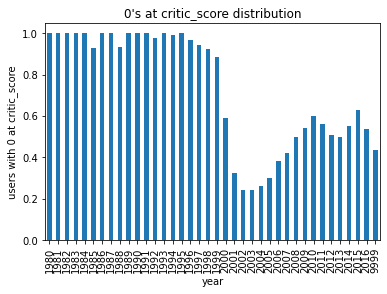

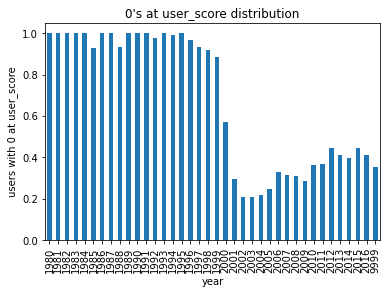

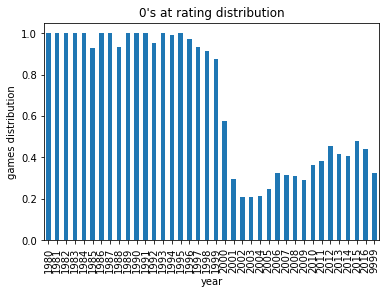

In [19]:
null_critic_score = games.loc[games['critic_score'].isnull()]
null_dist_critic_score_by_year = null_critic_score.groupby('year_of_release')['name'].count()/games.groupby('year_of_release')['name'].count()
null_dist_critic_score_by_year
%matplotlib inline
null_dist_critic_score_by_year.plot(kind ='bar')
plt.title("0's at critic_score distribution")
plt.ylabel('users with 0 at critic_score')
plt.xlabel("year")
plt.show()
null_user_score = games.loc[games['user_score'].isnull()]
null_dist_user_score_by_year = null_user_score.groupby('year_of_release')['name'].count()/games.groupby('year_of_release')['name'].count()
null_dist_user_score_by_year
%matplotlib inline
null_dist_user_score_by_year.plot(kind ='bar')
plt.title("0's at user_score distribution")
plt.ylabel('users with 0 at user_score')
plt.xlabel("year")
plt.show()
null_rating = games.loc[games['rating'].isnull()]
null_dist_rating_by_year = null_rating.groupby('year_of_release')['name'].count()/games.groupby('year_of_release')['name'].count()
null_dist_rating_by_year
%matplotlib inline
null_dist_rating_by_year.plot(kind ='bar')
plt.title("0's at rating distribution")
plt.ylabel('games distribution')
plt.xlabel("year")
plt.show()

By the graphs above: until 1999 almost non of the game has any kind of scoring or rating, maybe because it was hard to gether and keep the rating back then. 
I'm not going to fill the Nan values for scoring, It's fill's wrong. lets check he if the avrege of critic and user columns will make sense:

In [20]:
games['user_score_no_tbd'] = 10*pd.to_numeric(games['user_score'], errors='coerce')
games['avg_score'] = games[['user_score_no_tbd', 'critic_score']].mean(axis=1)
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_no_tbd,avg_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,80.0,78.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,83.0,82.5
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,80.0,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN


In [21]:
null_critic_score= games.loc[games['critic_score'].isnull()]
len(null_critic_score)

8578

Its better then before, but its not enough,
Im going to set the rest of the values as unknown. 

In [22]:
games.loc[games["avg_score"].isnull(), 'avg_score'] = 'unknown'
len(games.loc[games['avg_score'].isnull()])

0

In [23]:
games.loc[games["critic_score"].isnull(), 'critic_score'] = 'unknown'
len(games.loc[games['critic_score'].isnull()])

0

In [24]:
games.loc[games["user_score_no_tbd"].isnull(), 'user_score_no_tbd'] = 'unknown'
len(games.loc[games['user_score_no_tbd'].isnull()])

0

#### "rating" column:

"rating" coumn: 
object type
8 distict values, 
6,766 - 40.5% missing values.

by esrb websit- 
* E - Titles rated E (Everyone) 

* T - TEEN. Titles rated T (Teen) have content that may be suitable for ages 13 and older.

* M - Titles rated M (Mature) have content that may be suitable for persons ages 17 and older.

* E10+ -(Everyone 10+) rating indicates the content is generally suitable for ages 10 and up, 

* EC- Titles rated EC (Early Childhood) have content that may be suitable for persons ages 3 and older.

* K-A Kids-to-Adults rating Games with this rating contain content which the ESRB believes is generally suitable for all ages.

* RP - Titles listed as RP (Rating Pending) have been submitted to the ESRB and are awaiting final rating. This symbol appears only in advertising prior to a game's release.

* AO - "Adults Only" (AO) rating for 29 games, is the highest rating in the ESRB system, and indicates a game is only suitable for players age 18 and over.

I can assume the games that came out after 2015 should have RP rating,e the I can change the null values from 2015 and up, but still its feels wrong. 

In [25]:
games.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [26]:
games.loc[games["rating"].isnull(), 'rating'] = 'unknown'
len(games.loc[games['rating'].isnull()])

0

I cannot change the column type since it contain string and int or flow.

In [27]:
# Calculate the total sales (the sum of sales in all regions) for each game and store these values in a separate column:

games['sum_of_sales']= games['na_sales']+ games['eu_sales']+ games['jp_sales']+ games['other_sales']
games.head(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_no_tbd,avg_score,sum_of_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,80.0,78.0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,unknown,NaN,unknown,unknown,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,83.0,82.5,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,80.0,80.0,32.77


In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16715 non-null  object 
 1   platform           16715 non-null  object 
 2   year_of_release    16715 non-null  int32  
 3   genre              16715 non-null  object 
 4   na_sales           16715 non-null  float64
 5   eu_sales           16715 non-null  float64
 6   jp_sales           16715 non-null  float64
 7   other_sales        16715 non-null  float64
 8   critic_score       16715 non-null  object 
 9   user_score         10014 non-null  object 
 10  rating             16715 non-null  object 
 11  user_score_no_tbd  16715 non-null  object 
 12  avg_score          16715 non-null  object 
 13  sum_of_sales       16715 non-null  float64
dtypes: float64(5), int32(1), object(8)
memory usage: 1.7+ MB


### Analyze the data:

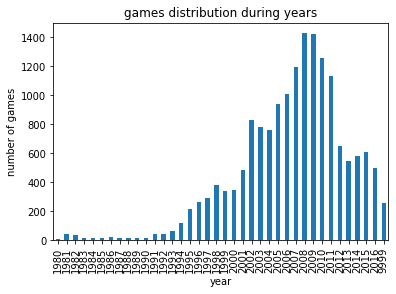

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     830
2003     779
2004     764
2005     941
2006    1008
2007    1198
2008    1429
2009    1426
2010    1255
2011    1137
2012     653
2013     544
2014     581
2015     606
2016     502
9999     254
Name: name, dtype: int64

In [29]:
#  Game release per year:
year_range = games.groupby('year_of_release')['name'].count()
%matplotlib inline
year_range.plot(kind ='bar')
plt.title("games distribution during years")
plt.ylabel('number of games')
plt.xlabel("year")
plt.show()
year_range

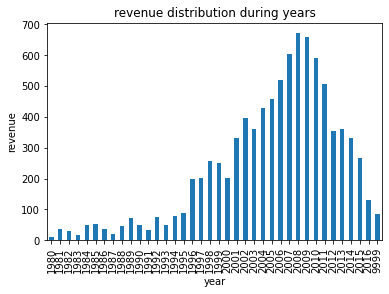

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     830
2003     779
2004     764
2005     941
2006    1008
2007    1198
2008    1429
2009    1426
2010    1255
2011    1137
2012     653
2013     544
2014     581
2015     606
2016     502
9999     254
Name: name, dtype: int64

In [30]:
year_revenue = games.groupby('year_of_release')['sum_of_sales'].sum()
%matplotlib inline
year_revenue.plot(kind ='bar')
plt.title("revenue distribution during years")
plt.ylabel('revenue')
plt.xlabel("year")
plt.show()
year_range

By the graph above we can see that during years 2006-2011 over 1000 games were release, 2008-2009 are in the top, 1429 1426 games release.

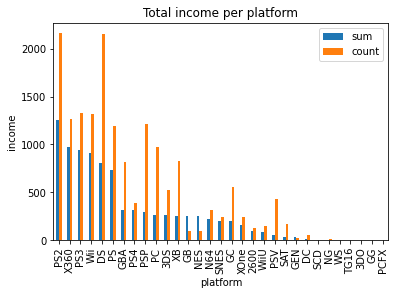

,platform,sum,count
16,PS2,1255.77,2161
28,X360,971.42,1262
17,PS3,939.65,1331
26,Wii,907.51,1320
4,DS,806.12,2151
15,PS,730.86,1197
6,GBA,317.85,822
18,PS4,314.14,392
19,PSP,294.05,1209
13,PC,259.52,974


In [31]:
# Analize by platform:
platform_income= games.groupby('platform')['sum_of_sales'].agg(["sum","count"])
platform_income= platform_income.reset_index().sort_values(by='sum', ascending=False)
%matplotlib inline
platform_income.plot(kind ='bar', x='platform')
plt.title("Total income per platform")
plt.ylabel('income')
plt.xlabel("platform")
plt.show()
platform_income


Revenue peaks are :
*	"PS2" platform with revenue of 1255.77 milion USD with 2161 games

*   "X360" platform with revenue of 971.42 milion USD with 1262 games

*   "PS3" platform with revenue of 939.65 milion USD with 1331 games

*   "Wii" platform with revenue of 907.51 milion USD with 1320 games

But its importent to notice that the lead platform had alot of games. 


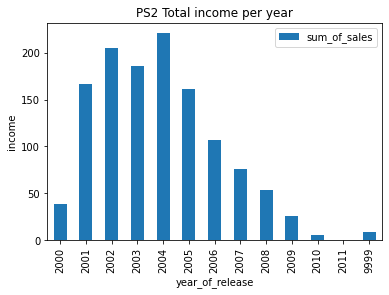

,year_of_release,sum_of_sales
0,2000,39.17
1,2001,166.43
2,2002,205.38
3,2003,185.93
4,2004,220.55
5,2005,160.98
6,2006,106.46
7,2007,75.99
8,2008,53.90
9,2009,26.40


In [32]:
# PS2 has the highest revenue, lets look at PS2 Total income per year:
PS2= games.query("platform == 'PS2'")
PS2_revenue_per_years = PS2.groupby('year_of_release')['sum_of_sales'].sum().reset_index()
%matplotlib inline
PS2_revenue_per_years.plot(kind ='bar', x='year_of_release')
plt.title("PS2 Total income per year")
plt.ylabel('income')
plt.xlabel("year_of_release")
plt.show()
PS2_revenue_per_years


In [33]:
# lets look at the platform with the highest revenue: 
platform_over30 = platform_income.loc[platform_income['sum'] > 300]
platform_over30

,platform,sum,count
16,PS2,1255.77,2161
28,X360,971.42,1262
17,PS3,939.65,1331
26,Wii,907.51,1320
4,DS,806.12,2151
15,PS,730.86,1197
6,GBA,317.85,822
18,PS4,314.14,392


In [34]:
relev_platform = platform_over30['platform'].values
relev_platform

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4'],
      dtype=object)

In [35]:
games_relev_platform = games.query('platform in @relev_platform')
games_relev_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_no_tbd,avg_score,sum_of_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,80.0,78.0,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,83.0,82.5,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,80.0,80.0,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,85.0,87.0,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,66.0,62.0,28.91


In [36]:
relv_plarform_compe = pd.pivot_table(
    games_relev_platform, 
    values = "sum_of_sales", 
    index = "year_of_release", 
    columns = "platform", 
    aggfunc = np.sum, 
    dropna= True
)
relv_plarform_compe.set_axis(['DS','GBA', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'x360'], axis='columns', inplace= True)
relv_plarform_compe

,DS,GBA,PS,PS2,PS3,PS4,Wii,x360
year_of_release,,,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN
2000,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN
2001,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN


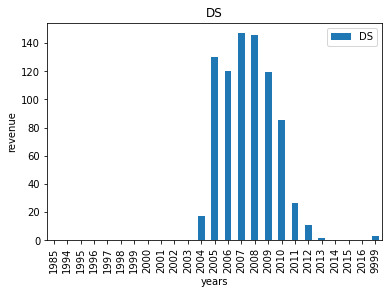

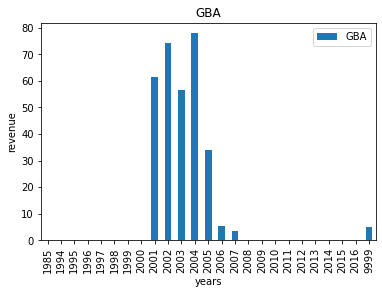

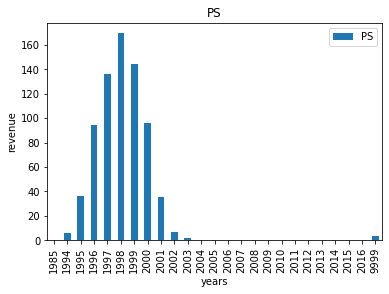

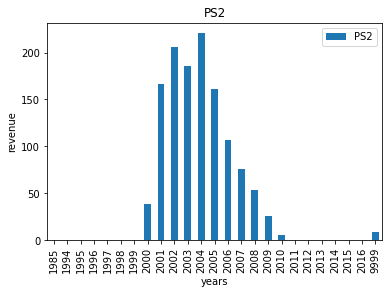

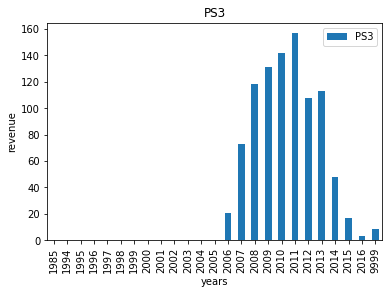

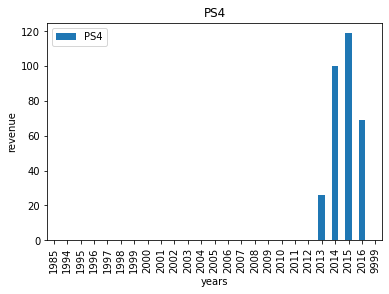

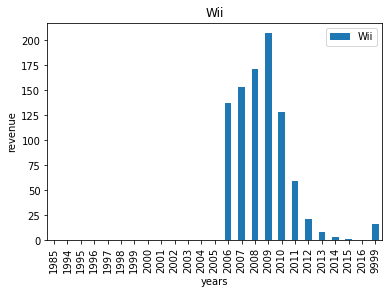

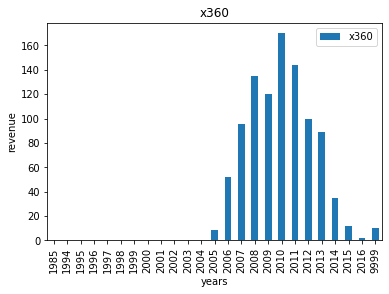

In [37]:
for i in relv_plarform_compe:
    %matplotlib inline
    relv_plarform_compe.plot(kind='bar', y= i )
    plt.title(i)
    plt.ylabel('revenue')
    plt.xlabel('years')
    plt.show()
    

PlayStation has 4 version : 
* PS came out in 1994 and showd revenue until 2003
* PS2 came out in 2000 and showd revenue until 2010
* PS3 came out in 2005 and showd revenue until 2011
* PS4 came out in 2013 and still showing revenue (at least antil 2017)

since 1994 almost every 6 years new platform pops, most of the platform stey relevnt for ~10 years.

####  mid conclution: 
By the graph above we can see that during years 2006-2011 over 1000 games were release, 2008-2009 are in the top, 1429 1426 games release.

Revenue peaks are :
*	"PS2" platform with revenue of 1255.77 milion USD

*   "X360" platform with revenue of 971.42 milion USD

*   "PS3" platform with revenue of 939.65 milion USD

*   "Wii" platform with revenue of 907.51 milion USD

highest revenue are for ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4'], 
since 1994 almost every 6 years new platform pops, most of the platform stey relevnt for ~10 years.

In order to build prognosis for 2017, Im going to look at the last 4 years.



In [38]:
prog_data= games.query("year_of_release > 2013 & year_of_release!= 9999")
prog_data.head(4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_no_tbd,avg_score,sum_of_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,unknown,NaN,unknown,unknown,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,83.0,90.0,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,unknown,NaN,unknown,unknown,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,43.0,62.5,8.58


In [39]:
relv_plarform_compe_prog = pd.pivot_table(
    prog_data, 
    values = "sum_of_sales", 
    index = "year_of_release", 
    columns = "platform", 
    aggfunc = np.sum,
    fill_value=0,
    dropna= True
)
relv_plarform_compe_prog

relv_plarform_compe_prog.set_axis(
    ['3DS','PC', 'PS3', 'PS4','PSP', 'PSV', 'Wii','WiiU', 'X360','XOne'],
    axis='columns', inplace= True)
relv_plarform_compe_prog

,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [40]:
relv_plarform_compe_prog.apply(sum, axis = 0)

3DS      86.68
PC       27.05
PS3      68.18
PS4     288.15
PSP       0.36
PSV      22.40
Wii       5.07
WiiU     42.98
X360     48.22
XOne    140.36
dtype: float64

* PS4 is leading in salse

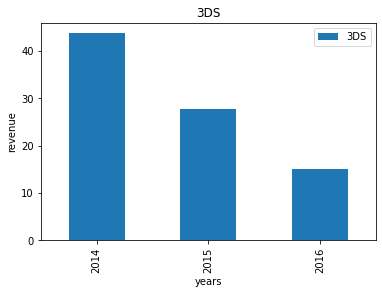

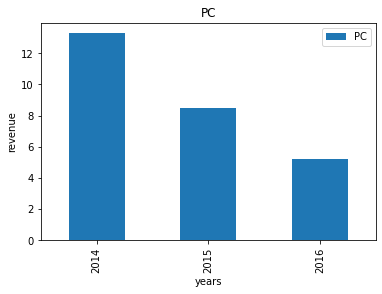

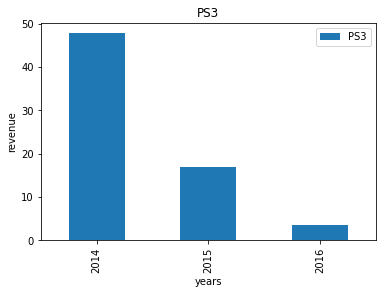

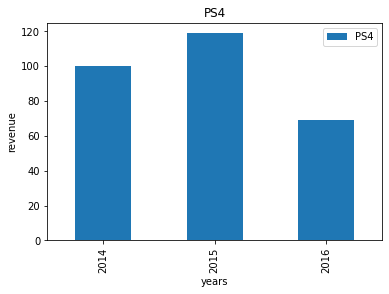

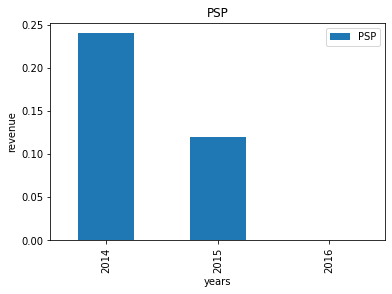

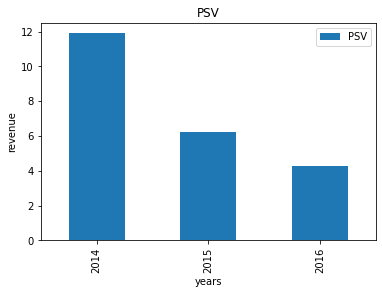

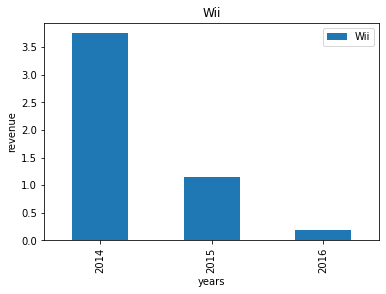

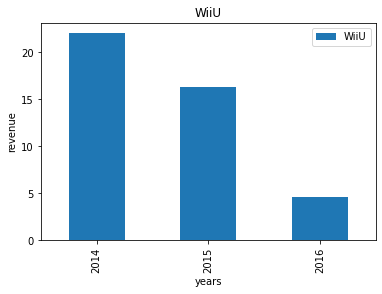

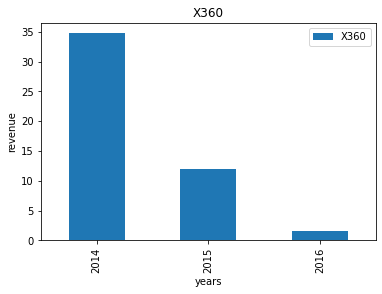

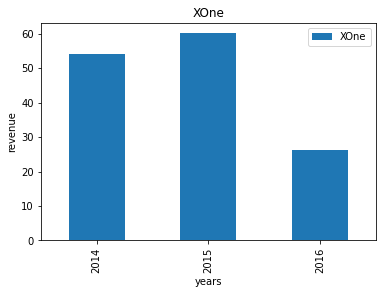

In [41]:
for i in relv_plarform_compe_prog:
    %matplotlib inline
    relv_plarform_compe_prog.plot(kind='bar', y= i )
    plt.title(i)
    plt.ylabel('revenue')
    plt.xlabel('years')
    plt.show()

* 3DS, PC, PS2, PS3, PSP, PSV, Wii, X360, XB sales are shrinking 
* WiiU, PS4, XOne also shows decline in salse, but ther's a chance that next years sale will rise (based on the graph's above)

In [42]:
grouped=prog_data.groupby(['platform','name'])['sum_of_sales'].sum().reset_index()
grouped

,platform,name,sum_of_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Haikyu!! Cross Team Match!,0.04
3,3DS,12-Sai. Honto no Kimochi,0.07
4,3DS,12-Sai. Koisuru Diary,0.05
...,...,...,...
1684,XOne,Wolfenstein: The Old Blood,0.15
1685,XOne,Worms: WMD,0.01
1686,XOne,XCOM 2,0.04
1687,XOne,ZombiU,0.01


In [43]:
order = grouped.groupby(['platform'])['sum_of_sales'].sum().reset_index().sort_values(by='sum_of_sales')['platform']
order
# order=grouped.groupby(['Platform'])['Total_sales'].sum().reset_index().sort_values(by='Total_sales')['Platform']
# order

4     PSP
6     Wii
5     PSV
1      PC
7    WiiU
8    X360
2     PS3
0     3DS
9    XOne
3     PS4
Name: platform, dtype: object

<AxesSubplot:xlabel='platform', ylabel='sum_of_sales'>

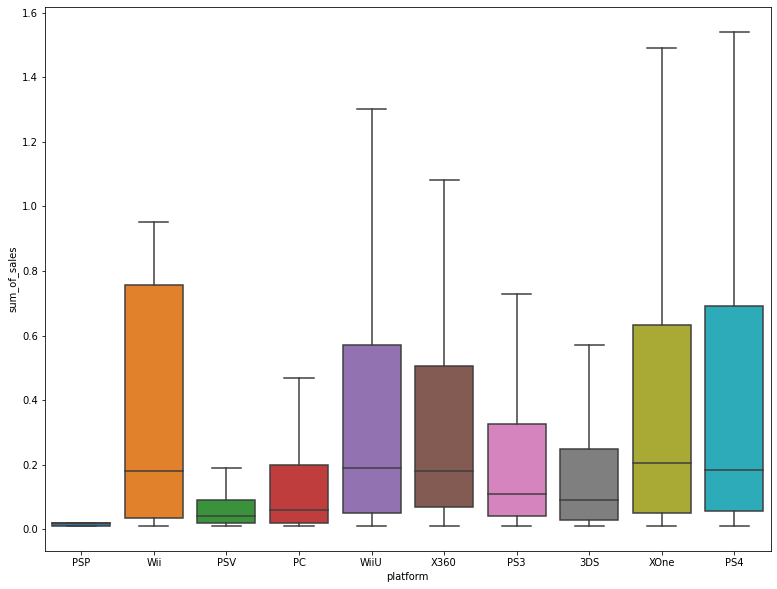

In [44]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='sum_of_sales',data=grouped, order=order ,showfliers = False)

** PS4, XOne, Wii, WiiU, X360 have the same median revenues.
PS4 ,Xone, and 3Ds are leading by income. 

In [45]:
# user an critic score correlation to sum_of_sales for PS2:

relevnt_score= games.query('user_score_no_tbd!="unknown" & critic_score!="unknown"')
relevnt_score.head()
relevnt_score['platform'].value_counts()

PS2     1161
X360     881
PS3      790
PC       703
XB       581
Wii      492
DS       469
PSP      393
GC       356
PS4      249
GBA      241
XOne     165
3DS      158
PS       156
PSV      119
WiiU      89
DC        14
Name: platform, dtype: int64

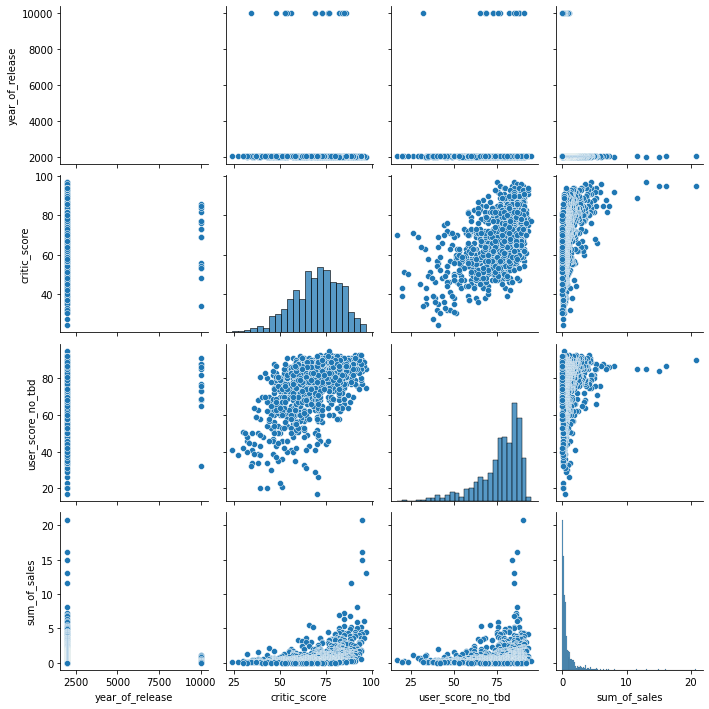

In [46]:
PS2_relevnt_score1= relevnt_score.query('platform == "PS2"')
PS2_relevnt_score= PS2_relevnt_score1[['name', 'year_of_release', 'critic_score', 'user_score_no_tbd','sum_of_sales']]
sns.pairplot(PS2_relevnt_score)
plt.show()


In [47]:
column_1= PS2_relevnt_score['sum_of_sales'].astype(float )
column_2 = PS2_relevnt_score['user_score_no_tbd'].astype(float)
column_3 = PS2_relevnt_score['critic_score'].astype(float )
corr1= column_1.corr(column_2)
corr2= column_1.corr(column_3)
print("correlation between sum_of_sales and user_score_no_tbd:", corr1)
print("correlation between sum_of_sales and critic_score:", corr2)

correlation between sum_of_sales and user_score_no_tbd: 0.1694198744859126
correlation between sum_of_sales and critic_score: 0.38921959991789373


* as we can see from the graph above:
    the correlation is 0.39 for critic score and 0.17 to user score. both lower then 0.75, but there is some kind of dependence. 
* sums of sales is growing with user score and critic score.
* the critic_score has higher correlation  to sum_of_sales and can give better indication.



In [48]:
# lets have a look at sales of the same game for different platform:
names_games_to_comp=PS2_relevnt_score1['name']
game_to_comp= relevnt_score.query('name in @names_games_to_comp')
game_to_comp['platform'].value_counts()

PS2     1161
XB       363
GC       221
X360      96
PSP       84
Wii       80
PS3       60
GBA       53
DS        51
PC        50
PS        13
3DS        2
DC         1
Name: platform, dtype: int64

In [49]:
XB_relevnt_score= game_to_comp.query('platform == "XB"')

column_1= XB_relevnt_score['sum_of_sales'].astype(float )
column_2 = XB_relevnt_score['user_score_no_tbd'].astype(float)
column_3 = XB_relevnt_score['critic_score'].astype(float )
corr1= column_1.corr(column_2)
corr2= column_1.corr(column_3)
print("correlation between sum_of_sales and user_score_no_tbd:", corr1)
print("correlation between sum_of_sales and critic_score:", corr2)

correlation between sum_of_sales and user_score_no_tbd: 0.20198829063892876
correlation between sum_of_sales and critic_score: 0.4205860334613526


* also for XB platform critic_score has better correlation to sum_of_sales

In [50]:
# Analize by genre:
relv_genre_compe = pd.pivot_table(
    games, 
    values = "sum_of_sales", 
    index = "year_of_release", 
    columns = "genre", 
    aggfunc = np.sum,
    fill_value=0,
    dropna= True
)
relv_genre_compe.set_axis(
    ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle', 'Racing', 'Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy', 'unknown'],
    axis='columns', inplace= True)
relv_genre_compe.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,unknown
year_of_release,,,,,,,,,,,,,
1980,0.34,0.0,0.77,2.70,0.00,0.00,0.00,0.0,7.07,0.00,0.50,0.0,0.0
1981,14.79,0.0,0.00,0.00,6.92,2.25,0.48,0.0,10.02,0.44,0.78,0.0,0.0
1982,6.50,0.0,0.00,0.87,5.03,10.04,1.57,0.0,3.81,0.00,1.06,0.0,0.0
1983,2.86,0.4,0.00,2.14,6.93,0.78,0.00,0.0,0.49,0.00,3.20,0.0,0.0
1984,1.85,0.0,0.00,1.45,0.69,3.14,5.95,0.0,31.10,0.00,6.17,0.0,0.0


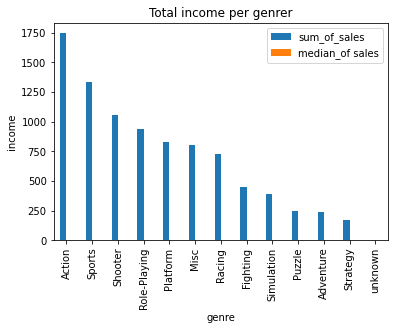

,genre,sum_of_sales,median_of sales
0,Action,1744.17,0.19
10,Sports,1331.27,0.22
8,Shooter,1052.45,0.24
7,Role-Playing,934.56,0.18
4,Platform,827.77,0.27
3,Misc,802.51,0.16
6,Racing,728.67,0.19
2,Fighting,447.53,0.21
9,Simulation,389.97,0.15
5,Puzzle,242.57,0.11


In [51]:
genre_income= games.groupby('genre').agg({'sum_of_sales':['sum', 'median']})  

genre_income.set_axis(['sum_of_sales','median_of sales'], axis='columns', inplace= True)
genre_income= genre_income.reset_index().sort_values(by='sum_of_sales', ascending=False)
%matplotlib inline
genre_income.plot(kind ='bar', x='genre')
plt.title("Total income per genrer")
plt.ylabel('income')
plt.xlabel("genre")
plt.show()
genre_income

# %matplotlib inline
# platform_income.plot(kind ='bar', x='platform')
# plt.title("Total income per platform")
# plt.ylabel('income')
# plt.xlabel("platform")
# plt.show()
# platform_income

Action is the most profitable genra, 
Strategy is the least profitable genra.

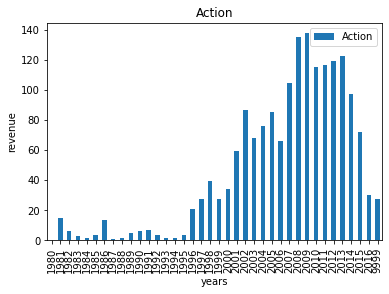

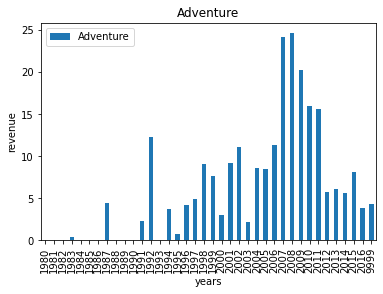

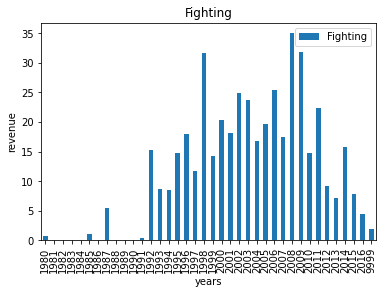

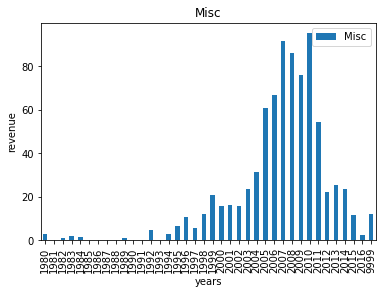

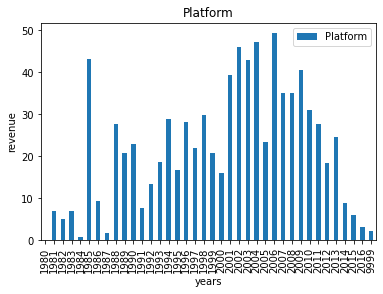

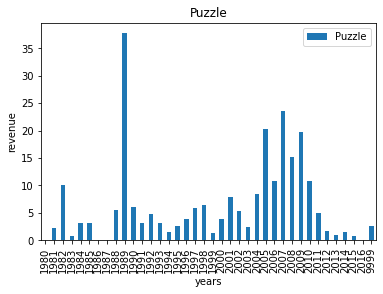

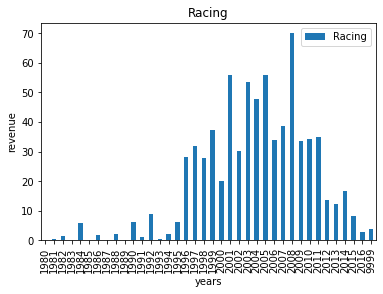

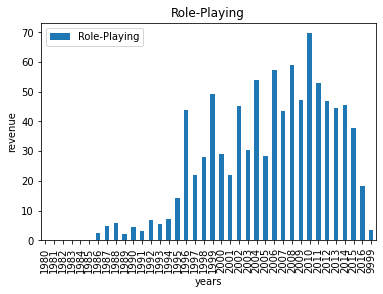

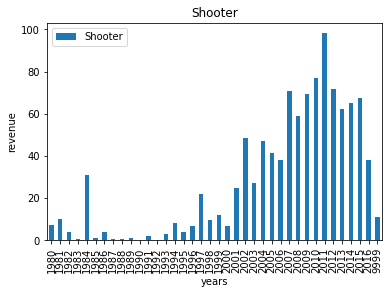

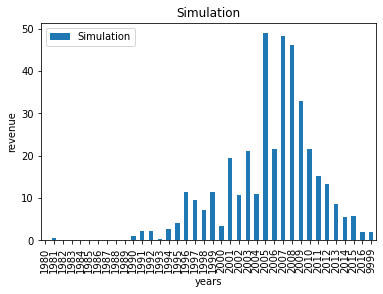

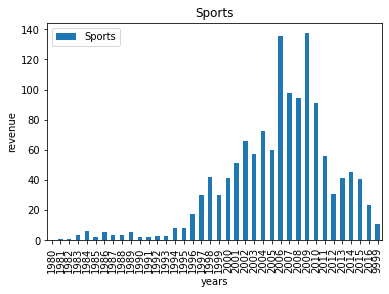

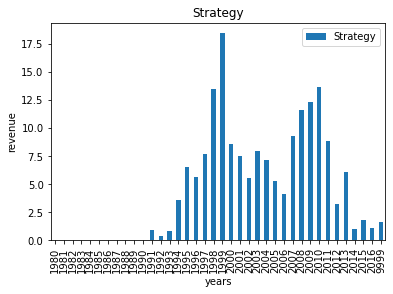

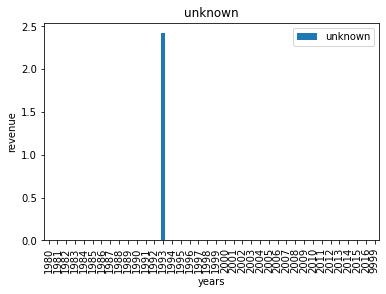

In [52]:
for i in relv_genre_compe:
    %matplotlib inline
    relv_genre_compe.plot(kind='bar', y= i )
    plt.title(i)
    plt.ylabel('revenue')
    plt.xlabel('years')
    plt.show()

* Action genre has a peak of 140 M$ at 2008-2009, its revenue start raising at 1996, at 2014 the revenue start to drop.

* Adventure has discreat peaks at 1987 of 12 M$, other then that its has the biggest pick at  2007, 2008 of 25 M$  but since 
then the revenue start to dropt 

* Fighting has discrete pick at 1998 of 30M $ and also in 2008-2009 35M $, since then the revenue drops.

* Misc revenu start raising at 1996 to pick of 85M $ at 2010 but since then the revenue drops.

* Platform stays relevant during the entire years fram its peck is 50M$ at 2006 but since then the revenue drops. 

* puzzle has the highst pick at 1989 with 35M$ , its had another smaller pick  at 2007 of 25M$ but since then the revenue drops.

* Racing start raisong at 1996 with pick at 2008 of 70M$ but since then the revenue drops.

* Role playimg start raising at 1987 with pick of 70M$ at 2010 but since then the revenue drops.

* Shootern has a discrete pick at 1984 of 38M$  but the revenue star grow stedily at 1994 with the highst pick at 2011 of 100M$ 
but since then the revenue drops.

*Simulation the revenue star grow stedily at 1994 with the highst pick at 2005 of 50 M$ another pick at 2011 of 15M$ but since then the revenue drops.

* Sports grow stedily at 1994 with the highst pick at 2009 of 140 M$  but since then the revenue drops.

* Strategy stedily at 1991 with the highst pick at 1999 of 17.5 M$ another pick at 2010 of 12.5M$ but since then the revenue drops.



### create user profile for each region:


In [53]:
na_pl= games.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
eu_pl= games.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
jp_pl= games.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
print(na_pl.head(5))
print(eu_pl.head(5))
print(jp_pl.head(5))

   platform  na_sales
28     X360    602.47
16      PS2    583.84
26      Wii    496.90
17      PS3    393.49
4        DS    382.40
   platform  eu_sales
16      PS2    339.29
17      PS3    330.29
28     X360    270.76
26      Wii    262.21
15       PS    213.61
   platform  jp_sales
4        DS    175.57
15       PS    139.82
16      PS2    139.20
23     SNES    116.55
2       3DS    100.67


* for north america the top platform are: 

* X360- 602.47 M$, 

* PS2-583 M$,

* Wii- 496.9 M$, 

* PS3- 393.49 M$,

* DS- 382.4 M$


* for europ the top platform are:

* PS2- 339.29 M$,

* PS3-330.29 M$, 

* X360- 270.76 M$,

* Wii- 262.21 M$, 

* PS- 213.61 M$


* for japan the top platform are: 

* DS 175.57 M$, 

* PS-139.2 M$, 

* PS2- 139.2 M$, 

* SNES- 116.55 M$,

* 3DS 100.67 M$

In [54]:
na_gn= games.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
eu_gn= games.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
jp_gn= games.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
print(na_gn.head(5))
print(eu_gn.head(5))
print(jp_gn.head(5))

       genre  na_sales
0     Action    879.01
10    Sports    684.43
8    Shooter    592.24
4   Platform    445.50
3       Misc    407.27
      genre  eu_sales
0    Action    519.13
10   Sports    376.79
8   Shooter    317.34
6    Racing    236.51
3      Misc    212.74
           genre  jp_sales
7   Role-Playing    355.41
0         Action    161.43
10        Sports    135.54
4       Platform    130.83
3           Misc    108.11


* for north america the top genre are:  

* Action- 879.01 M$, 

* Sports-684.43 M$,

* Shooter- 592.24 M$, 

* Platform- 445.50 M$,

* Misc- 407.27 M$


* for europ the top genre are:

* Action- 519.13 M$,

* Sports-376.79 M$, 

* Shooter- 317.34 M$,

* Racing- 236.51 M$, 

* Misc- 212.74 M$


* for japan the top genre are: 
	
* Role-Playing 355.41 M$, 

* Action-161.43 M$, 

* Sports- 135.54 M$, 

* Platform- 130.83 M$,

* Misc 108.11 M$

its make sense that top genre is changing between region, sense there are cultural diffrences

In [55]:
esrb_games= games.query('rating != "unknown"')
esrb_games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_no_tbd,avg_score,sum_of_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,80.0,78.0,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,83.0,82.5,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,80.0,80.0,32.77


  rating  na_sales
0     AO      1.26
1      E   1292.99
2   E10+    353.32
3     EC      1.53
4    K-A      2.56
5      M    748.48
6     RP      0.00
7      T    759.75
  rating  eu_sales
0     AO      0.61
1      E    710.25
2   E10+    188.52
3     EC      0.11
4    K-A      0.27
5      M    483.97
6     RP      0.08
7      T    427.03
  rating  jp_sales
0     AO      0.00
1      E    198.11
2   E10+     40.20
3     EC      0.00
4    K-A      1.46
5      M     64.24
6     RP      0.00
7      T    151.40


<Figure size 720x720 with 0 Axes>

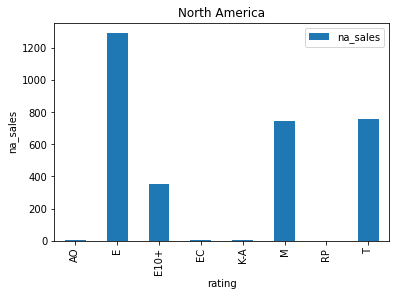

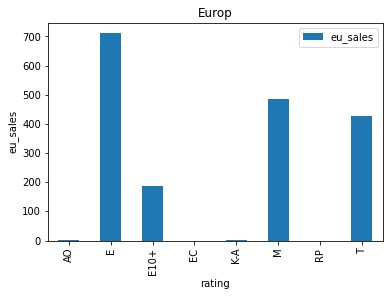

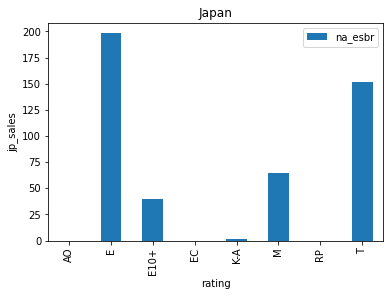

In [56]:

na_esbr= esrb_games.groupby('rating')['na_sales'].sum().reset_index()
eu_esbr= esrb_games.groupby('rating')['eu_sales'].sum().reset_index()
jp_esbr= esrb_games.groupby('rating')['jp_sales'].sum().reset_index()
print(na_esbr)
print(eu_esbr)
print(jp_esbr)

plt.figure(figsize=(10, 10))
na_esbr.plot(kind = 'bar', x ='rating', y='na_sales') 
plt.title('North America')
plt.xlabel('rating')
plt.ylabel('na_sales')
eu_esbr.plot(kind = 'bar', x ='rating', y='eu_sales') 
plt.title('Europ')
plt.xlabel('rating')
plt.ylabel('eu_sales')
jp_esbr.plot(kind = 'bar', x ='rating', y='jp_sales') 
plt.title('Japan')
plt.xlabel('rating')
plt.ylabel('jp_sales')
plt.legend(['na_esbr', 'eu_esbr', 'jp_esbr'])

* At all region E rate is leading on sales
* At Japan T (teen 13+) lead M (mature 17+) 
* at Europ and North America M (mature 17+)  lead  T (teen 13+)

### Test the follwing hypotheses:
* average user rating of Xbox One and PC platform are the same
* average user rating of Action and Sport genra are different

In [57]:
user_rate_xone= games.query('user_score_no_tbd != "unknown" & platform=="XOne"')
user_rate_xone= user_rate_xone['user_score'].astype(float)
user_rate_xone.head(4)

165    7.9
179    5.4
242    6.4
270    6.2
Name: user_score, dtype: float64

In [58]:
user_rate_pc= games.query('user_score_no_tbd != "unknown" & platform=="PC"')
user_rate_pc=user_rate_pc['user_score'].astype(float)
user_rate_pc.head(4)

85     7.6
138    7.3
192    4.0
218    8.2
Name: user_score, dtype: float64

In [59]:
user_rate_xone_mean = user_rate_xone.mean()
user_rate_xone_variance = np.var(user_rate_xone)
user_rate_xone_std =  np.sqrt(user_rate_xone_variance)
print('user_rate_xone mean: ', user_rate_xone_mean)
print('user_rate_xone variance: ', user_rate_xone_variance)
print('user_rate_xone standard deviation: ', user_rate_xone_std)
print('most data can be found in this range: ', 
      (user_rate_xone_mean- 3*user_rate_xone_std, user_rate_xone_mean + 3*user_rate_xone_std))
print()
user_rate_pc_mean = user_rate_pc.mean()
user_rate_pc_variance = np.var(user_rate_pc)
user_rate_pc_std =  np.sqrt(user_rate_pc_variance)
print('user_rate_pc mean: ', user_rate_pc_mean)
print('user_rate_pc variance: ', user_rate_pc_variance)
print('user_rate_pc standard deviation: ', user_rate_pc_std)
print('most data can be found in this range: ', 
      (user_rate_pc_mean- 3*user_rate_pc_std, user_rate_pc_mean + 3*user_rate_pc_std))
print()
st.levene( user_rate_xone, user_rate_pc, center ='mean')

user_rate_xone mean:  6.52142857142857
user_rate_xone variance:  1.8965188383045533
user_rate_xone standard deviation:  1.3771415462124992
most data can be found in this range:  (2.390003932791072, 10.652853210066066)

user_rate_pc mean:  7.062467532467546
user_rate_pc variance:  2.337747158036762
user_rate_pc standard deviation:  1.5289693123266936
most data can be found in this range:  (2.475559595487465, 11.649375469447627)



LeveneResult(statistic=3.1662496092712744, pvalue=0.07549452472408175)

In [65]:
user_rate_xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [60]:
# h0: average user rating of Xbox One and PC platform are the same
alpha = 0.05 
result1 = st.ttest_ind(user_rate_xone,
                       user_rate_pc, equal_var = False)

print ('p-value: ', result1.pvalue)


if result1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
print('user_rate_xone mean: ', user_rate_xone_mean)
print('user_rate_pc mean: ', user_rate_pc_mean)

p-value:  4.935072360183565e-06
We reject the null hypothesis
user_rate_xone mean:  6.52142857142857
user_rate_pc mean:  7.062467532467546


* the null hypotheses :average user rating of Xbox One and PC platform are the same, we reject the null hypotheses, user score for PC ans XOne are not the same.

In [61]:
user_rate_action= games.query('user_score_no_tbd != "unknown" & genre=="Action"')
user_rate_action= user_rate_action['user_score'].astype(float)
user_rate_action.head(2)

16    8.2
17    9.0
Name: user_score, dtype: float64

In [62]:
user_rate_sport= games.query('user_score_no_tbd != "unknown" & genre=="Sports"')
user_rate_sport= user_rate_sport['user_score'].astype(float)
user_rate_sport.head(2)

0    8.0
3    8.0
Name: user_score, dtype: float64

In [63]:
user_rate_sport_mean = user_rate_sport.mean()
user_rate_sport_variance = np.var(user_rate_sport)
user_rate_sport_std =  np.sqrt(user_rate_sport_variance)
print('user_rate_sport mean: ', user_rate_sport_mean)
print('user_rate_sport variance: ', user_rate_sport_variance)
print('user_rate_sport standard deviation: ', user_rate_sport_std)
print('most data can be found in this range: ', 
      (user_rate_sport_mean- 3*user_rate_sport_std, user_rate_sport_mean + 3*user_rate_sport_std))
print()
user_rate_action_mean = user_rate_action.mean()
user_rate_action_variance = np.var(user_rate_action)
user_rate_action_std =  np.sqrt(user_rate_action_variance)
print('user_rate_action mean: ', user_rate_action_mean)
print('user_rate_action variance: ', user_rate_action_variance)
print('user_rate_action standard deviation: ', user_rate_action_std)
print('most data can be found in this range: ', 
      (user_rate_action_mean- 3*user_rate_action_std, user_rate_action_mean + 3*user_rate_action_std))
print()
st.levene( user_rate_sport, user_rate_action, center ='mean')

user_rate_sport mean:  6.961196736174073
user_rate_sport variance:  2.5941606711770206
user_rate_sport standard deviation:  1.610639832854329
most data can be found in this range:  (2.1292772376110856, 11.79311623473706)

user_rate_action mean:  7.054043715846988
user_rate_action variance:  2.030636653826616
user_rate_action standard deviation:  1.4250040890561038
most data can be found in this range:  (2.779031448678677, 11.329055983015298)



LeveneResult(statistic=20.782708914182898, pvalue=5.355232768513885e-06)

In [64]:
# h0: average user rating of sport and action genre are the same
alpha = 0.05 
result1 = st.ttest_ind(user_rate_sport,
                       user_rate_action, equal_var = False)

print ('p-value: ', result1.pvalue)


if result1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
print('user_rate_sport mean: ', user_rate_sport_mean)
print('user_rate_action mean: ', user_rate_action_mean)

p-value:  0.11483818791498286
We can't reject the null hypothesis
user_rate_sport mean:  6.961196736174073
user_rate_action mean:  7.054043715846988


* the null hypotheses :average user rating of sport and action genre are the same, we cant reject the null hypotheses,we cant say that user score for action and sport are not the same.

#### Genral coclution:
The data has alot of missing value's. 
I could not think of good way to fill the missing values, so I sliced the relvent data every time. 
During years 2006-2011 over 1000 games were release, 2008-2009 are in the top, 1429 1426 games release.

Revenue peaks are :
*	"PS2" platform with revenue of 1255.77 milion USD with 2161 games

*   "X360" platform with revenue of 971.42 milion USD with 1262 games

*   "PS3" platform with revenue of 939.65 milion USD with 1331 games

*   "Wii" platform with revenue of 907.51 milion USD with 1320 games

* since 1994 almost every 6 years new platform pops, most of the platform stey relevnt for ~10 years.
PS3, X360, aPS4, GBA,  and Xone have the same median revenues.
Wii ,X360 ,and PS3 are leading by income.

* PS2 has the highst revenue, I check the corraltion between revenues and score:
the correlation is 0.39 for critic score and 0.17 to user score. both lower then 0.75, but there is some kind of dependence. 
sums of sales is growing with user score and critic score.
the critic_score has higher correlation  to sum_of_sales and can give better indication.

* For XBOx:
correlation between sum_of_sales and user_score_no_tbd: 0.201988290638929
correlation between sum_of_sales and critic_score: 0.4205860334613527
also for XBOX platform critic_score has better correlation to sum_of_sales

* Action is the most profitable genra, Strategy is the least profitable genra.

* Action genre has a peak of 140 M$ at 2008-2009, its revenue start raising at 1996, at 2014 the revenue start to drop.

* Adventure has discreat peaks at 1987 of 12 M$, other then that its has the biggest pick at  2007, 2008 of 25 M$  but since 
then the revenue start to dropt 

* Fighting has discrete pick at 1998 of 30M $ and also in 2008-2009 35M $, since then the revenue drops.

* Misc revenu start raising at 1996 to pick of 85M $ at 2010 but since then the revenue drops.

* Platform stays relevant during the entire years fram its peck is 50M$ at 2006 but since then the revenue drops. 

* puzzle has the highst pick at 1989 with 35M$ , its had another smaller pick  at 2007 of 25M$ but since then the revenue drops.

* Racing start raisong at 1996 with pick at 2008 of 70M$ but since then the revenue drops.

* Role playimg start raising at 1987 with pick of 70M$ at 2010 but since then the revenue drops.

* Shootern has a discrete pick at 1984 of 38M$  but the revenue star grow stedily at 1994 with the highst pick at 2011 of 100M$ 
but since then the revenue drops.

*Simulation the revenue star grow stedily at 1994 with the highst pick at 2005 of 50 M$ another pick at 2011 of 15M$ but since then the revenue drops.

* Sports grow stedily at 1994 with the highst pick at 2009 of 140 M$  but since then the revenue drops.

* Strategy stedily at 1991 with the highst pick at 1999 of 17.5 M$ another pick at 2010 of 12.5M$ but since then the revenue drops.

* for north america the top platform are: 

* X360- 602.47 M$, 

* PS2-583 M$,

* Wii- 496.9 M$, 

* PS3- 393.49 M$,

* DS- 382.4 M$


* for europ the top platform are:

* PS2- 339.29 M$,

* PS3-330.29 M$, 

* X360- 270.76 M$,

* Wii- 262.21 M$, 

* PS- 213.61 M$


* for japan the top platform are: 

* DS 175.57 M$, 

* PS-139.2 M$, 

* PS2- 139.2 M$, 

* SNES- 116.55 M$,

* 3DS 100.67 M$


* for north america the top genre are:  

* Action- 879.01 M$, 

* Sports-684.43 M$,

* Shooter- 592.24 M$, 

* Platform- 445.50 M$,

* Misc- 407.27 M$


* for europ the top genre are:

* Action- 519.13 M$,

* Sports-376.79 M$, 

* Shooter- 317.34 M$,

* Racing- 236.51 M$, 

* Misc- 212.74 M$


* for japan the top genre are: 
	
* Role-Playing 355.41 M$, 

* Action-161.43 M$, 

* Sports- 135.54 M$, 

* Platform- 130.83 M$,

* Misc 108.11 M$

Its make sense that top genre is changing between region, sense there are cultural diffrences

* At all region E rate is leading on sales
* At Japan T (teen 13+) lead M (mature 17+) 
* at Europ and North America M (mature 17+)  lead  T (teen 13+)

for the two null hypotheses:
* the null hypotheses :average user rating of Xbox One and PC platform are the same, we reject the null hypotheses, user score for PC ans XOne are not the same.

* * the null hypotheses :average user rating of sport and action genre are the same, we cant reject the null hypotheses,we cant say that user score for action and sport are not the same.